<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Frequency-response-of-a-closed-loop-system" data-toc-modified-id="Frequency-response-of-a-closed-loop-system-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Frequency response of a closed loop system</a></span><ul class="toc-item"><li><span><a href="#Controller-Validation:-PI-Velocity-Controller" data-toc-modified-id="Controller-Validation:-PI-Velocity-Controller-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Controller Validation:</em> PI Velocity Controller</a></span></li><li><span><a href="#Creating-a-Sinusoidal-Input-to-your-closed-loop-control-system" data-toc-modified-id="Creating-a-Sinusoidal-Input-to-your-closed-loop-control-system-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating a Sinusoidal Input to your closed loop control system</a></span></li><li><span><a href="#Collect-Frequency-Response-Data" data-toc-modified-id="Collect-Frequency-Response-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Collect Frequency Response Data</a></span></li></ul></li><li><span><a href="#Digital-Control" data-toc-modified-id="Digital-Control-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Digital Control</a></span><ul class="toc-item"><li><span><a href="#PI-Velocity-Control" data-toc-modified-id="PI-Velocity-Control-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PI Velocity Control</a></span></li></ul></li></ul></div>


## Frequency response of a closed loop system

While it is possible to [sketch a Bode diagram for a system with a known transfer function](../W12B_FrequencyResponse/W12A_FrequencyResponse.ipynb#How-do-we-characterize-a-system's-response-to-a-sinusoidal-input?), it is often useful to establish the frequency response of a system experimentally in order to either confirm its behavior matches your expectations, or to determine its transfer function in cases where a step response test is either not practical or would not yield enough information to fully explore or characterize a system's behavior.  To practice obtaining frequency response data experimentally, you will examine the steady state sinusoidal response of a system under closed loop control.  For this experiment you will use the PI controller for angular velocity that you designed and implemented in Lab 6 to control the benchtop motor-shaft-load system's angular velocity.  However, in addition to giving the system a step input to verify its behavior under closed-loop control, you will provide it a sinusoidal input.


### *Controller Validation:* PI Velocity Controller
You will be using the **MOTOR-RIGID SHAFT-LOAD** configuration that you used in Lab 7:

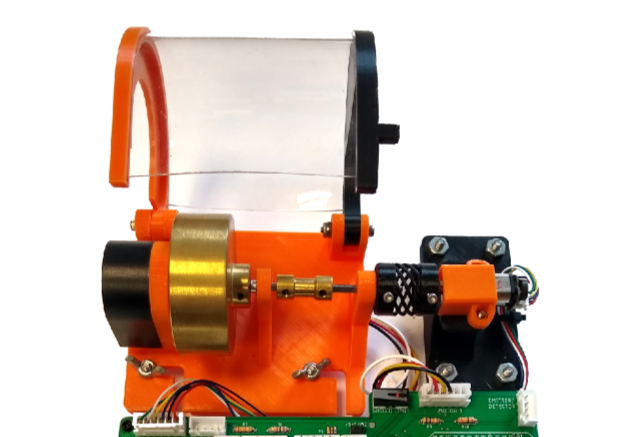

You can make use of the angular velocity plant you developed in Lab 7 to design an angular velocity PI controller.  You will need to design for closed loop behavior with the following characteristics:
* **a settling time of 1.5 to 2 times faster than the open loop plant behavior**
* **damping ratio $\zeta = 0.5$.**  

*If you aren't confident in the plant you constructed in Lab 7, take a minute to generate a new one now!  You can revisit your code from lab 6 where you designed a PI controller or also take this opportunity to practice by constructing a new one.*

Perform all of the required calculations in the code block below. Output the following:
* **Plot** your plant model response along with the actual response as evidence of the **validation of your plant model.**
* Calculations for your selection of relevant zeros or gains
* **Root locus plot that shows your target eigenvalue location** and that the designed root locus passes throught that point
* **Output** your zero and gain $K$.
* **Output** your calculated controller gains $k_p$, $k_i$, and $k_{sum}$.
* **Plot** an actual step response and compare it to the predicted behavior on the same graph as a **validation of your controller model.**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

### Creating a Sinusoidal Input to your closed loop control system

To date, you have applied a step input to the system using the use buttons.  However, with a few modifications the Arduino code can generate a sinusoidal input with adjustable amplitude and frequency.  

<font color='blue'>If you are using code from Lab 6, MAKE A COPY and implement the following modifications.</font>

<font size = 4> **WITHIN void setup** </font>
```C++
startTime = millis();
```

<font size = 4> **WITHIN void loop** </font>
```C++
elapsedTime = (millis()-startTime)/1000.0;
f = 1.0; //Hz.
// You can also use a potentiometer to set the frequency.

//The code below replaces the existing code that calculates your desired velocity "r"
//Use one of the potentiometers to adjust the "desiredVelocityAmplitude" to be between 0-300 rad/s
r = desiredVelocityAmplitude*sin(f*2*PI*elapsedTime)+shift; //set "shift" so the sine wave output is always positive;
```
<font color='blue'>*Ensure you declare any new variables appropriately*</font>


### Collect Frequency Response Data

* Set the amplitude and frequency in the code above to produce a complete sine wave at 1 Hz. You can use the ***serial plotter*** to confirm your signal is correct.
* Output the desired velocity and the actual velocity to the ***serial plotter**** and observe the behavior.  If the desired velocity is is not entirely sinusoidal, adjust the amplitude.
* Ensure the output velocity is always positive and never reaches 0 rad/s once the system reaches steady state by adjusting the value of "shift".  *If you are not sure why you want to do this... ask!* 
* By observing the behavior of the output for a range of frequencies using the serial plotter, determine the lower and upper frequency limit outside of which the behavior of the output is "uninteresting". 
* Using ```logspace()``` select a set of frequencies throughout the range of "interesting" behavior you identified.
* Capture the input and output velocity amplitude to perform the fequency analysis in Octave.
* ***Manually*** generate a mangitude ratio Bode plot from this initial data.  
* Continue to record/plot data at different frequencies until the behavior across the entire range is smoothly represented and easily identifiable.    
* Estimate the natural frequency of the closed loop system from the Bode plot.  If sufficient data has not been recorded to make a reasonable estimate, ***add data where necessary***.

*In the code cell below construct the Bode plot of your experimental data.  On your plot, identify the measured and theoretically predicted closed loop natural frequency.*

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

**Include in the cell below a copy of your completed Arduino code. Double-click on this cell to see how to properly format your code as shown below:**

```c
//sample Arduino code
//properly formated for display
```

</font>

YOUR ANSWER HERE

## Digital Control

The closed loop controllers you have implemented this semester have all been digital controllers.  The Arduinos you are using are one example of a microcontroller which is a small computer that typically perform a single function.


Unlike a controller made from analog electronic amplifiers that essentially respond continuously to changes in the system ([op-amps](https://www.youtube.com/watch?v=bc8YrxqhtJo) are a common example), microcontrollers respond at descrete times.  To date you have been implicitly assuming that the response of the microcontroller is modeled accurately by continuous-time math.  This lab will explore the limitations of that assumption.

### PI Velocity Control

Using the same PI controller from the first part of this lab, perform the following experiment.  Make sure to make a new copy of the file so the original is preserved.

**Capture the velocity response to a step input and compare it to your model's prediction in Matlab to confirm your controller is working properly and plot below.**  

Although you did this at the start of the lab, you've made changes since.  This is an important step to confirm the entire system is set up and working as expected!


In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

To assess the impact of the sampling time for the microcontroller:

* Add a [delay](https://www.arduino.cc/reference/en/language/functions/time/delay/) to your loop to increase the time between the samples the controller uses to update the control signal.  Print out the time between loops (sampling time).
* Increase the delay time until you find the ***minimum*** sampling time that causes the closed-loop system response to be unstable.

**Plot the response when the system JUST becomes unstable in the code cell below.**


In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

**Report the sampling time that causes the system to become unstable and describe the instability in the Markdown cell below.**

YOUR ANSWER HERE

Now record the system response to a step input (magnitude is your choice) ***at several sampling times up to the sampling time that causes the system to become unstable.**
* In the Octave cell below, show and label the responses **on a single plot.**  

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

* Using the plot, explain how the system eigenvalues appear to be changing with increasing sample time in the Markdown cell below.

YOUR ANSWER HERE

With the system at the **minimum sample time required to cause instability**, adjust the $k_{sum}$ value until the closed-loop response is stable again, and has a *similar* overshoot to the original design. 
* Plot this response and the continuous system response (no delay) on the same plot in the Matlab cell below.

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

* Explain the differences in the two responses in the Markdown cell below

YOUR ANSWER HERE